# Post-COVID Evaluation

In [1]:
import sys
sys.path.append('../')
from src.scoring_functions import *
from src.load_data import *
from plotnine import *

In [2]:
# df.value = df.value.round()

In [3]:
# df = df[df.forecast_date != '2023-12-28']

In [4]:
model_names = {
    'KIT-MeanEnsemble' : 'Ensemble',
    'lightgbm2' : 'LightGBM-Old',
    'lightgbm23' : 'LightGBM',
    'lightgbm_skip': 'LightGBM-Skip',
    'lightgbm_retrain': 'LightGBM-Retrain',
    'tsmixer' : 'TSMixer',
    'KIT-hhh4' : 'hhh4',
    'KIT-hhh4_all_data': 'hhh4_all_data',
    'KIT-hhh4_all_data_skip': 'hhh4_all_data_skip',
    'KIT-baseline' : 'Nowcast',
    'baseline' : 'Baseline'
}

In [5]:
model_colors = {
    "LightGBM": "#B30000",
    "TSMixer": "#E69F00",
    "LightGBM-Retrain": "#999999",
    "Nowcast": "#56B4E9",
    "hhh4_all_data": "#F0E442",
    "Ensemble": "#009E73",
    "LightGBM-Old": "#60D1B3",
    "Baseline": "#80471C",
    "hhh4": "#3C4AAD",
    "hhh4_all_data_skip": "#CC79A7",
    "LightGBM-Skip": "#000000"
}

In [6]:
model_names = {
    'KIT-MeanEnsemble' : 'Ensemble',
    'lightgbm_retrain': 'LightGBM',
    'lightgbm_precov': 'LightGBM-PreCov',
    'tsmixer_retrain' : 'TSMixer',
    'tsmixer_precov': 'TSMixer-PreCov',
    #'KIT-hhh4' : 'hhh4-noCov',
    'KIT-hhh4_all_data': 'hhh4',
    'KIT-baseline' : 'Nowcast',
    'KIT-persistence': 'Baseline-Persistence',
    'baseline' : 'Baseline-Historical'
}

In [7]:
model_colors = {
    "LightGBM": "#B30000",
    "TSMixer": "#E69F00",
    'TSMixer-Retrain': "#E69F00",
    'TSMixer-PreCov': "#E69F00",
    "LightGBM-Retrain": "#999999",
    "Nowcast": "#56B4E9",
    "hhh4_all_data": "#F0E442",
    "Ensemble": "#009E73",
    'LightGBM-PreCov': "#60D1B3",
    "Baseline-Historical": "#80471C",
    'Baseline-Persistence' : "#80471C",
    "hhh4": "#3C4AAD",
    "hhh4_all_data_skip": "#CC79A7",
    "LightGBM-Skip": "#000000"
}

In [8]:
MODELS = ['lightgbm_retrain',#'lightgbm_precov', 
          'tsmixer_retrain', #'tsmixer_precov', 
          'baseline', 'KIT-persistence',
          'KIT-hhh4_all_data', #'KIT-hhh4',
          'KIT-MeanEnsemble']

In [9]:
df = load_predictions('post-covid')

In [10]:
df = df[df.model.isin(MODELS)]

In [11]:
df.model = df.model.replace(model_names)

In [12]:
df = df[df.forecast_date != '2023-12-28']

In [13]:
df.model.unique()

array(['TSMixer', 'LightGBM', 'Baseline-Historical',
       'Baseline-Persistence', 'hhh4', 'Ensemble'], dtype=object)

In [14]:
df = df[df.forecast_date != '2023-12-28']

In [15]:
df = df[df.forecast_date.between('2023-11-16', '2024-09-15')].reset_index(drop=True)

# Compute scores

#### National level

In [17]:
evaluate_models(df, 'national')

,model,spread,overprediction,underprediction,wis,c50,c95
0,Ensemble,439.565077,172.478837,356.460427,968.504342,0.523256,0.976744
1,TSMixer,488.082541,296.324327,285.316159,1069.723027,0.587209,0.959302
2,LightGBM,400.940764,52.842545,653.096853,1106.880162,0.552326,0.936047
3,hhh4,429.671927,390.166944,368.155316,1187.994186,0.447674,0.889535
4,Baseline-Persistence,672.385922,641.775748,298.365449,1612.527118,0.581395,0.912791
5,Baseline-Historical,458.267954,12.857143,1600.589768,2071.714865,0.189189,0.506757


In [35]:
# evaluate_models(df, 'national', by_horizon=True)

#### Age groups

In [19]:
evaluate_models(df, 'age')

,model,spread,overprediction,underprediction,wis,c50,c95
0,Ensemble,95.666729,44.403161,62.374769,202.444659,0.533915,0.959302
1,LightGBM,69.571635,32.892676,124.591757,227.056068,0.347868,0.820736
2,hhh4,118.145764,65.449612,54.678295,238.273671,0.579457,0.964147
3,TSMixer,99.282788,69.968401,77.721633,246.972823,0.466085,0.881783
4,Baseline-Persistence,104.014030,126.905177,73.104928,304.024135,0.440891,0.810078
5,Baseline-Historical,97.237524,7.680985,239.796654,344.715162,0.269144,0.625000


In [12]:
# evaluate_models(df, 'age', by_horizon=True)

In [13]:
# evaluate_models(df, 'age', by_age=True)

# Plots

In [20]:
df_national = evaluate_models(df, 'national')
df_age = evaluate_models(df, 'age')

In [21]:
df_wide = pd.concat([
    df_national.assign(level='national'),
    df_age.assign(level='age')],
    ignore_index=True)

In [22]:
df_wide['level'] = pd.Categorical(df_wide['level'], categories=['national', 'age'], ordered=True)

In [23]:
df_long = pd.melt(df_wide, id_vars=['level', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

In [24]:
desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4', 'Baseline-Persistence', 'Baseline-Historical']
df_long['model'] = pd.Categorical(df_long['model'], categories=desired_order, ordered=True) 

In [25]:
# df_long['level'] = pd.Categorical(df_long['level'], categories=['national', 'age'], ordered=True)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


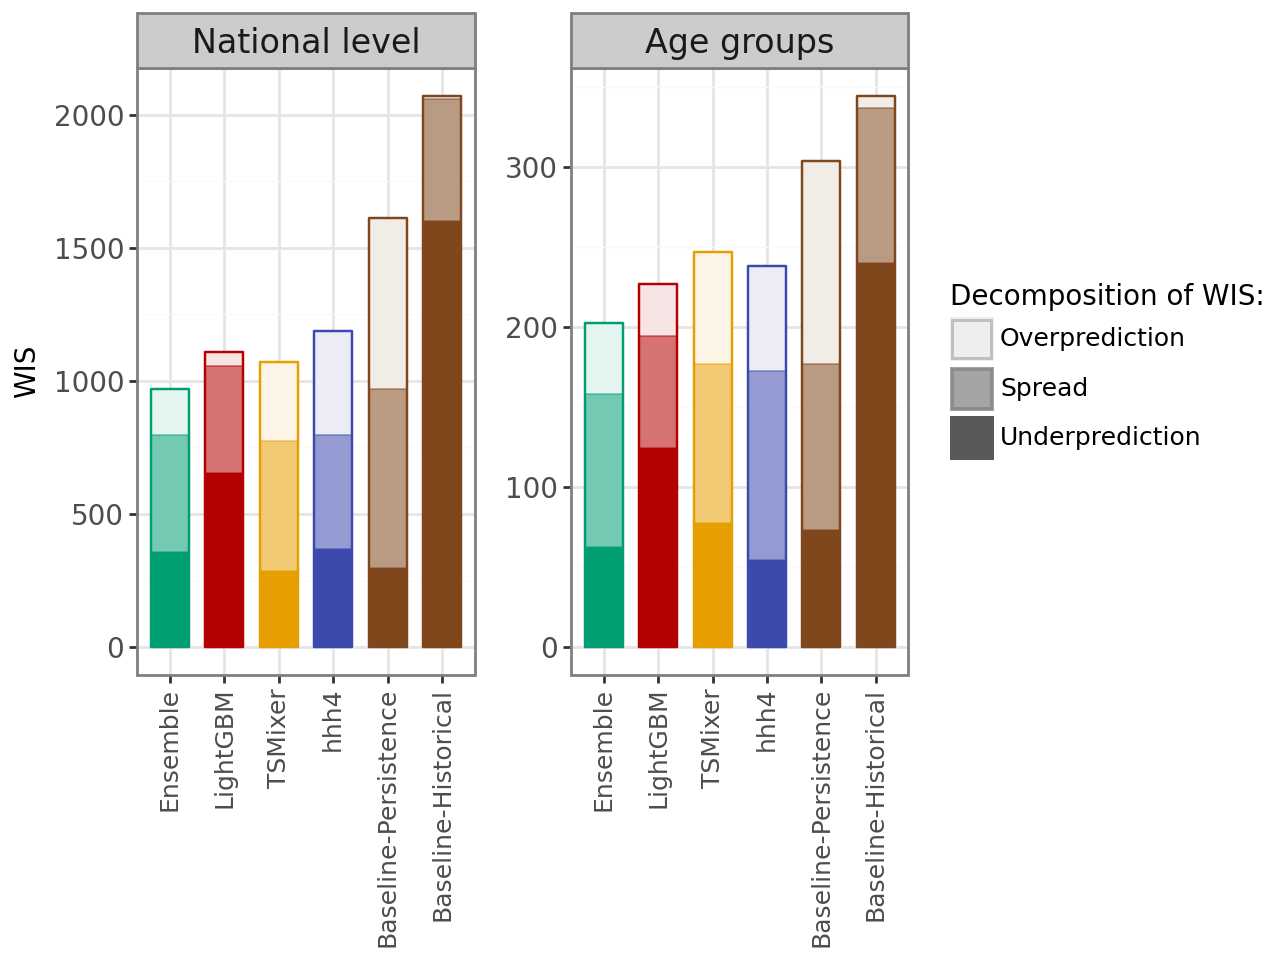

In [26]:
p = (ggplot()
    + facet_wrap('~level', nrow=1, scales='free_y', labeller=lambda x: ('National level' if x == 'national' else 'Age groups'))
    + geom_bar(df_long[df_long.metric == 'wis'], aes(x='model', y='value', color='model'), fill='white', stat='identity', width=0.7, show_legend=False)
    + geom_bar(df_long[df_long.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric', color='model'), size=0.1, stat='identity', width=0.7, 
               show_legend={'color': False,
                            'fill': False,
                            'alpha': True})
    + scale_color_manual(values=model_colors)
    + scale_fill_manual(values=model_colors)
    + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=False))
    + labs(x="", y="WIS", color="Model", alpha="Decomposition of WIS:", title="")
    #+ coord_flip()
    + theme_bw()
    + theme(legend_position='right',
            legend_title_position='top',
            strip_text=element_text(size=12),             # Facet title text size
            legend_title=element_text(size=10),           # Legend title text size
            legend_text=element_text(size=9),             # Legend item text size
            axis_text_x=element_text(size=9, rotation=90, ha="center"),                # Axis text (tick labels) size
            axis_text_y=element_text(size=10),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=14))              # Plot title text size)
   )
p

In [27]:
p.save("../figures/wis.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis.pdf


In [139]:
coverage_df = df_national

In [28]:
coverage_df = df_wide

In [29]:
desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4', 'Baseline-Persistence', 'Baseline-Historical']
coverage_df['model'] = pd.Categorical(coverage_df['model'], categories=desired_order, ordered=True) 

In [30]:
alphas = {"50%": 0.7, "95%": 0.4}

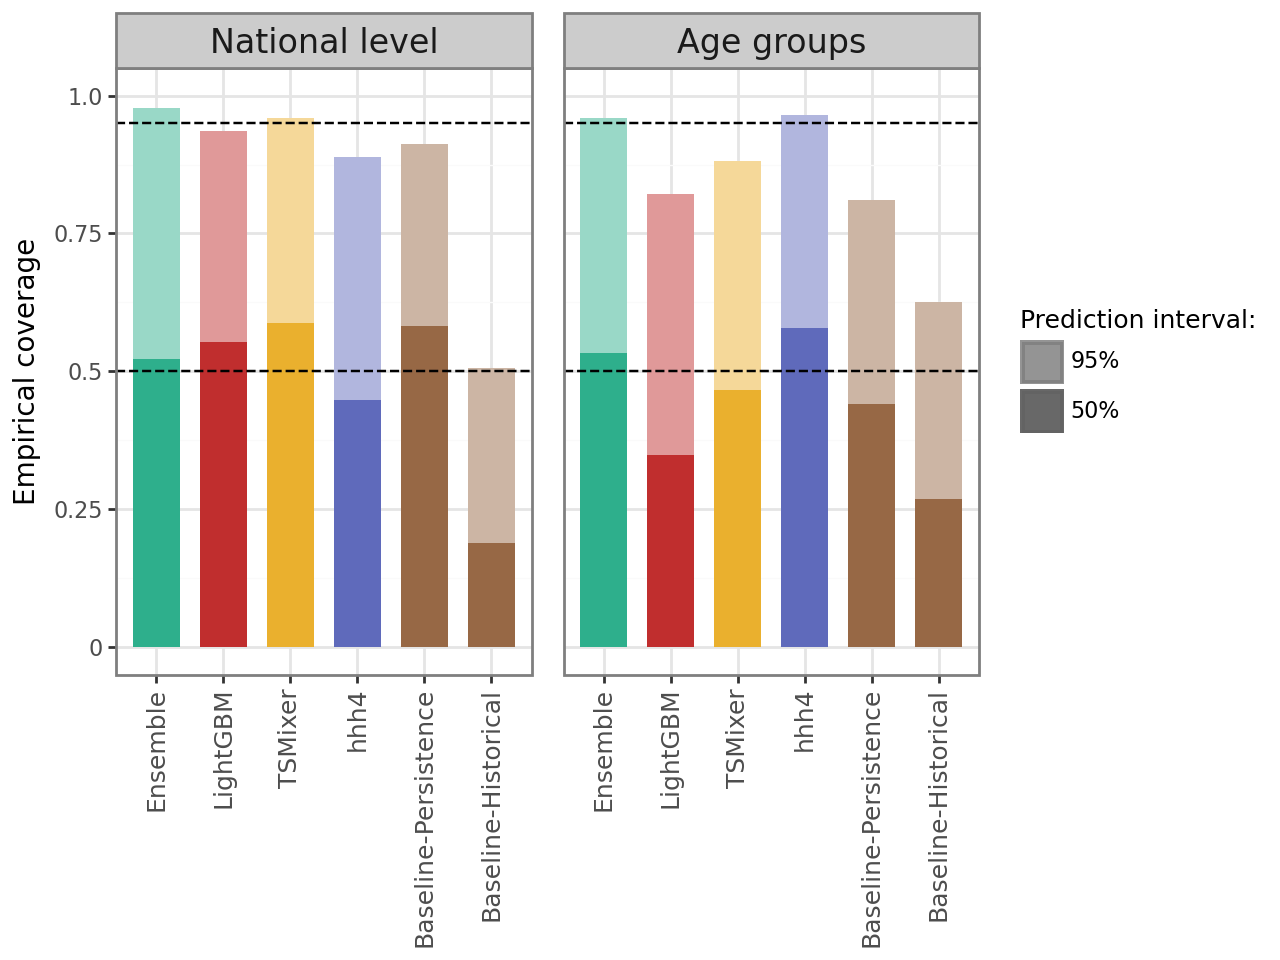

In [31]:
p = (
    ggplot(coverage_df, aes(x='model'))
    + facet_wrap('~level', nrow=1, scales='fixed', labeller=lambda x: ('National level' if x == 'national' else 'Age groups'))
    + expand_limits(y=1)  # Ensure y-axis starts at 1
    
    # Add columns for 95% and 50% coverage with respective alpha transparency
    + geom_col(aes(y='c95'), width=0.7, fill='white', show_legend={'fill': False})
    + geom_col(aes(y='c95', fill='model', alpha='"95%"'), width=0.7, show_legend={'fill': False})
    + geom_col(aes(y='c50', fill='model', alpha='"50%"'), width=0.7, show_legend={'fill': False})
    
    # Horizontal dashed lines at y = 0.5 and y = 0.95
    + geom_hline(yintercept=[0.5, 0.95], linetype='dashed')
    
    # Customize y-axis labels to display "0" instead of omitting 0
    + scale_y_continuous(labels=lambda y: ["0" if val == 0 else val for val in y])
    
    # Labels for axes, color, and alpha legend
    + labs(
        x='',
        y="Empirical coverage",
        color="Model",
        alpha="Prediction interval: "
    )
    
    # Conditional color mapping for fill
    + scale_fill_manual(values=model_colors)
    
    # Flip coordinates to make x-axis vertical
    #+ coord_flip()
    
    # Custom alpha levels for each bar transparency
    + scale_alpha_manual(values=alphas, guide=guide_legend(reverse=False))
    
    # Basic theme with customized legend position and alignment
    + theme_bw()
    + theme(
        legend_position='right',
        legend_title_position='top',
        strip_text=element_text(size=12),
        legend_title=element_text(size=9),
        legend_text=element_text(size=8),
        axis_text_x=element_text(size=9, rotation=90, ha="center"),
        axis_text_y=element_text(size=8),
        axis_title=element_text(size=10),
        plot_title=element_text(size=14),
        panel_spacing=0.025
    )
)

# Display the plot
p

In [32]:
p.save("../figures/coverage.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/coverage.pdf


## By horizon

In [19]:
df_national = evaluate_models(df, 'national', by_horizon=True)
df_age = evaluate_models(df, 'age', by_horizon=True)

df_wide = pd.concat([
    df_national.assign(level='national'),
    df_age.assign(level='age')],
    ignore_index=True)

df_long = pd.melt(df_wide, id_vars=['level', 'horizon', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

df_long['level'] = pd.Categorical(df_long['level'], categories=['national', 'age'], ordered=True)

In [20]:
def plot_scores_by_horizon_and_model(df, level='national'):
    scores = df[df.level==level].copy()
    
    desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4']
    scores['model'] = pd.Categorical(scores['model'], categories=desired_order, ordered=True) 
    
    plot = (
        ggplot() 
        + geom_bar(scores[scores.metric == 'wis'], aes(x='model', y='value', color='model'), fill='white', stat='identity', width=0.7,
                   show_legend=False)
        + geom_bar(scores[scores.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric'), size=0.1, stat='identity', width=0.7, 
                   show_legend={'color': False,
                                'fill': False,
                                'alpha': True})
        + scale_color_manual(values=model_colors)
        + scale_fill_manual(values=model_colors)
        + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=False))
        + labs(x="", y="WIS", color="Model", alpha="Decomposition\nof WIS:", title="")
        + facet_grid(cols='horizon', labeller=lambda x: 'Horizon: ' + str(x))  # Create a facet for each horizon
        # + facet_wrap('~horizon', nrow=4, labeller=lambda x: 'Horizon: ' + str(x))  # Create a facet for each horizon
        + theme_bw()
        + theme(legend_position='right',
            legend_title_position='top',
            strip_text=element_text(size=10),             # Facet title text size
            legend_title=element_text(size=9),           # Legend title text size
            legend_text=element_text(size=8),             # Legend item text size
            axis_text_x=element_text(size=9, rotation=90, ha="center"),               # Axis text (tick labels) size
            axis_text_y=element_text(size=9),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=14)              # Plot title text size)
       )
        #+ coord_flip()
    )
    
    return plot

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


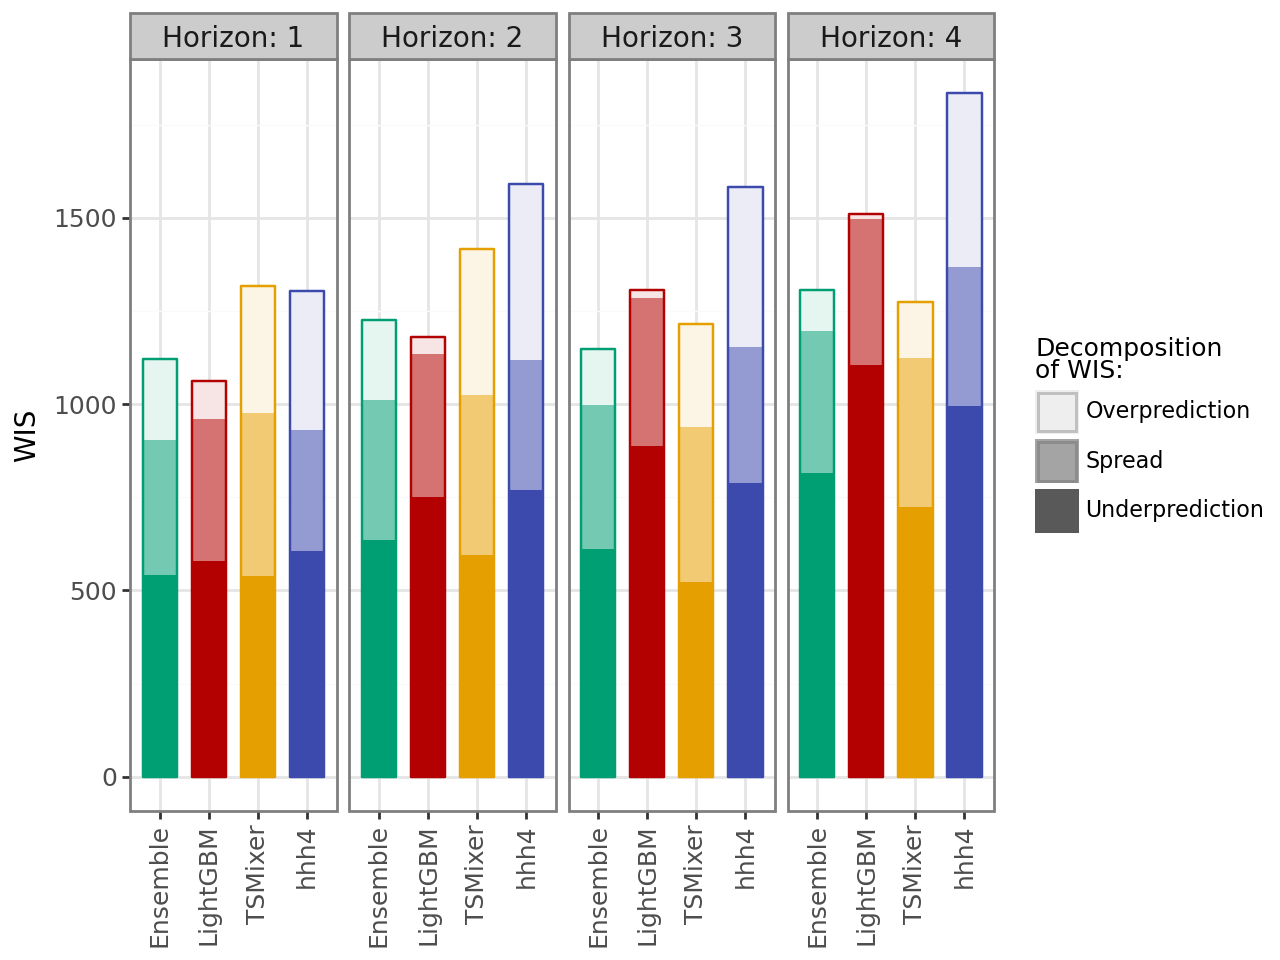

In [21]:
p = plot_scores_by_horizon_and_model(df_long, 'national')
p

In [139]:
p.save("../figures/wis_national_horizon.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_national_horizon.pdf


/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


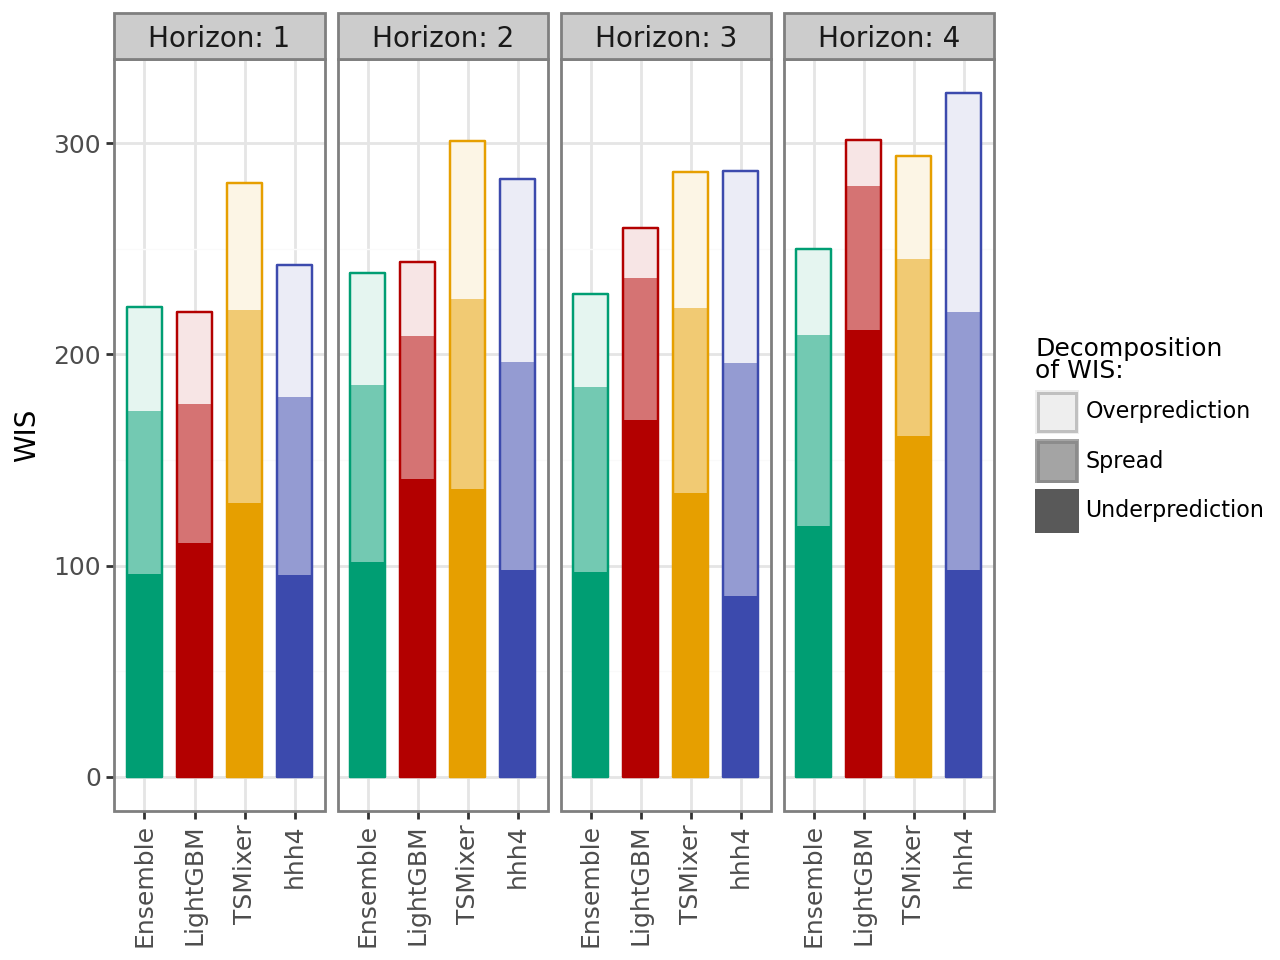

In [22]:
p = plot_scores_by_horizon_and_model(df_long, level='age')
p

In [141]:
p.save("../figures/wis_age_horizon.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_age_horizon.pdf


## By age group

In [57]:
scores_age = evaluate_models(df, 'age', by_age=True)

In [58]:
scores_age = pd.melt(scores_age, id_vars=['age_group', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

In [59]:
def plot_scores_by_age_group(scores):
    # desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4']
    # scores['model'] = pd.Categorical(scores['model'], categories=desired_order, ordered=True) 
    
    plot = (
        ggplot() 
        + geom_bar(scores[scores.metric == 'wis'], aes(x='model', y='value', color='model'), fill='white', stat='identity', width=0.7,
                   show_legend=False)
        + geom_bar(scores[scores.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric'), size=0.1, stat='identity', width=0.7, 
                   show_legend={'color': False,
                                'fill': False,
                                'alpha': True})
        + scale_color_manual(values=model_colors)
        + scale_fill_manual(values=model_colors)
        + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=False))
        + labs(x="", y="WIS", color="Model", alpha="Decomposition\nof WIS:", title="")
        + facet_wrap('~age_group')
        + theme_bw()
        + theme(legend_position='right',
            legend_title_position='top',
            strip_text=element_text(size=10),             # Facet title text size
            legend_title=element_text(size=9),           # Legend title text size
            legend_text=element_text(size=8),             # Legend item text size
            axis_text_x=element_text(size=9, rotation=90, ha="center"),               # Axis text (tick labels) size
            axis_text_y=element_text(size=9),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=14)              # Plot title text size)
       )
        #+ coord_flip()
    )
    
    return plot

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


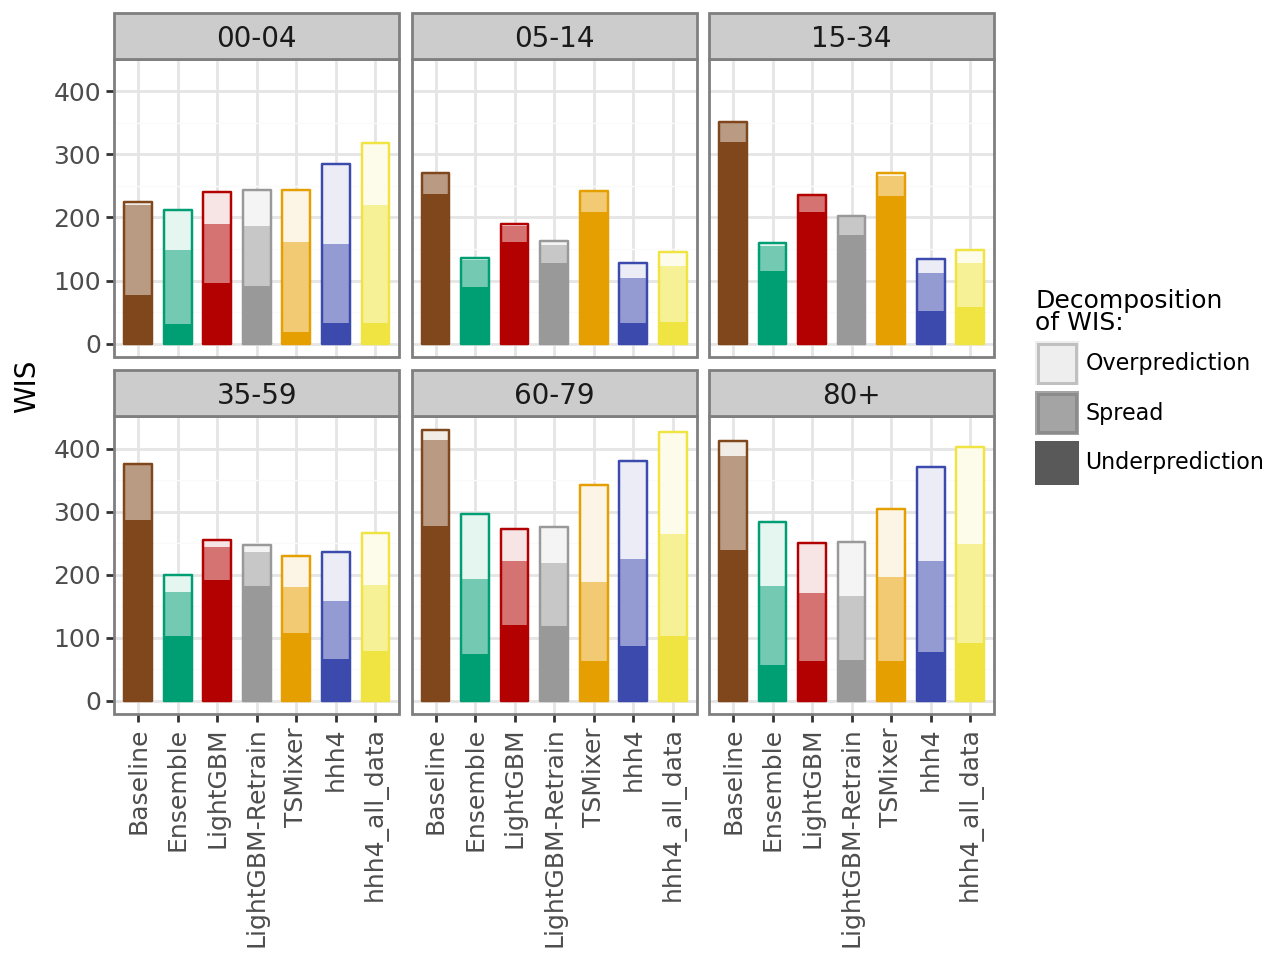

In [60]:
p = plot_scores_by_age_group(scores_age)
p

In [61]:
p.save("../figures/wis_age.pdf", width = 160, height = 110, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 110.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_age.pdf
